In [1]:
setwd('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/Experiments/3. Plasma Microvesicles/3.1. Publication Identifications/Input')
Output = c('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/Experiments/3. Plasma Microvesicles/3.1. Publication Identifications/Output')
cur_date = "012022"

library(readxl)
library(tidyverse)
library(reshape2)
library(patchwork)

#reading in files
exp_details = data.frame(read_excel("Experiment_Details_052521.xlsx"))
mrna_details = data.frame(read_excel("MRNA_Details_052521.xlsx"))
mirna_details = data.frame(read_excel("MiRNA_Details_052521.xlsx"))
protein_functions = data.frame(read_excel("Protein Functions.xlsx", sheet = 1))
mirna_functions = data.frame(read_excel("miRNA Functions.xlsx", sheet = 1))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
#first combining all these files to see what mrnas/ mirnas are associated with microvesicles
mrna_data = inner_join(exp_details, mrna_details) %>%
    #removing variables that aren't necessary 
    select(-c('EXPERIMENT.DESCRIPTION', 'CONTENT.ID'))
head(mrna_data)

mirna_data = inner_join(exp_details, mirna_details) %>%
    #removing variables that aren't necessary 
    select(-c('EXPERIMENT.DESCRIPTION', 'CONTENT.ID'))
head(mirna_data)

Joining, by = c("EXPERIMENT.ID", "SPECIES", "METHODS")



,EXPERIMENT.ID,PUBMED.ID,SPECIES,SAMPLE.NAME,IDENTIFICATIONS,METHODS,YEAR,ISOLATION.METHOD,VESICLE.TYPE,CONTENT.TYPE,ENTREZ.GENE.ID,GENE.SYMBOL
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,43,17076679,Homo sapiens,Plasma - Pregnant and not-pregnant women,Protein,Western blotting,2006,"Size exclusion chromatography|Ultracentrifugation|Immunobeads (CD3, CD19, CD56, CD83, PLAP)",Exosomes,protein,250,ALPP
2,43,17076679,Homo sapiens,Plasma - Pregnant and not-pregnant women,Protein,Western blotting,2006,"Size exclusion chromatography|Ultracentrifugation|Immunobeads (CD3, CD19, CD56, CD83, PLAP)",Exosomes,protein,356,FASLG
3,43,17076679,Homo sapiens,Plasma - Pregnant and not-pregnant women,Protein,Western blotting,2006,"Size exclusion chromatography|Ultracentrifugation|Immunobeads (CD3, CD19, CD56, CD83, PLAP)",Exosomes,protein,29126,CD274
4,68,19619303,Homo sapiens,Plasma - Ovarian cancer,Protein,Western blotting,2009,Differential centrifugation,Exosomes,protein,1364,CLDN4
5,199,21609964,Homo sapiens,Plasma - Normal,Protein,Western blotting,2011,Differential centrifugation|Filtration,Exosomes,protein,928,CD9
6,353,24115447,Homo sapiens,Plasma - Normal,Protein,Mass spectrometry [Orbitrap Velos]|Western blotting,2013,Differential centrifugation|Filtration|Ultracentrifugation,Exosomes,protein,7037,TFRC


Joining, by = c("EXPERIMENT.ID", "SPECIES", "METHODS")



,EXPERIMENT.ID,PUBMED.ID,SPECIES,SAMPLE.NAME,IDENTIFICATIONS,METHODS,YEAR,ISOLATION.METHOD,VESICLE.TYPE,CONTENT.TYPE,MIRNA.ID,Entrez.GENE.ID,COMMENTS
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,325,19289371,Homo sapiens,Plasma - Lung adenocarcinoma patients,miRNA,Microarray,2009,Size exclusion chromatography|Immunobeads (EpCAM),Exosomes,mirna,miR-17-3p,406952,Ambiguous mapping to Entrez gene ID
2,325,19289371,Homo sapiens,Plasma - Lung adenocarcinoma patients,miRNA,Microarray,2009,Size exclusion chromatography|Immunobeads (EpCAM),Exosomes,mirna,miR-21,406991,Clear hit to Entrez gene ID
3,325,19289371,Homo sapiens,Plasma - Lung adenocarcinoma patients,miRNA,Microarray,2009,Size exclusion chromatography|Immunobeads (EpCAM),Exosomes,mirna,miR-106a,406899,Clear hit to Entrez gene ID
4,325,19289371,Homo sapiens,Plasma - Lung adenocarcinoma patients,miRNA,Microarray,2009,Size exclusion chromatography|Immunobeads (EpCAM),Exosomes,mirna,miR-146,NOTFOUND,NOTFOUND
5,325,19289371,Homo sapiens,Plasma - Lung adenocarcinoma patients,miRNA,Microarray,2009,Size exclusion chromatography|Immunobeads (EpCAM),Exosomes,mirna,miR-155,406947,Clear hit to Entrez gene ID
6,325,19289371,Homo sapiens,Plasma - Lung adenocarcinoma patients,miRNA,Microarray,2009,Size exclusion chromatography|Immunobeads (EpCAM),Exosomes,mirna,miR-191,406966,Clear hit to Entrez gene ID


# How many proteins or miRNAs have been identified?

In [3]:
#we're dealing with 1,512 unique genes and 143 unique miRNAs so visualizations might be a bit challenging
length(unique(mrna_data$GENE.SYMBOL))
length(unique(mirna_data$MIRNA.ID))

[1] 1512

[1] 143

# From how many unique publications?

In [4]:
length(unique(mrna_data$PUBMED.ID))
length(unique(mirna_data$PUBMED.ID))

[1] 28

[1] 5

In [5]:
#did some rearranging so the dataframes match
all_data = data.frame(rbind(mrna_data %>%
                        rename(ID = GENE.SYMBOL),
                        mirna_data %>%
                        select(-COMMENTS) %>%
                        rename(ID = MIRNA.ID, ENTREZ.GENE.ID = Entrez.GENE.ID)))

publication_count = all_data %>%
    group_by(CONTENT.TYPE, PUBMED.ID) %>%
    count() %>%
    arrange(CONTENT.TYPE, -n)

head(publication_count)

CONTENT.TYPE,PUBMED.ID,n
<chr>,<dbl>,<int>
mirna,19002258,76
mirna,28357077,60
mirna,19289371,12
mirna,19951903,6
mirna,25104112,2
protein,23056467,956


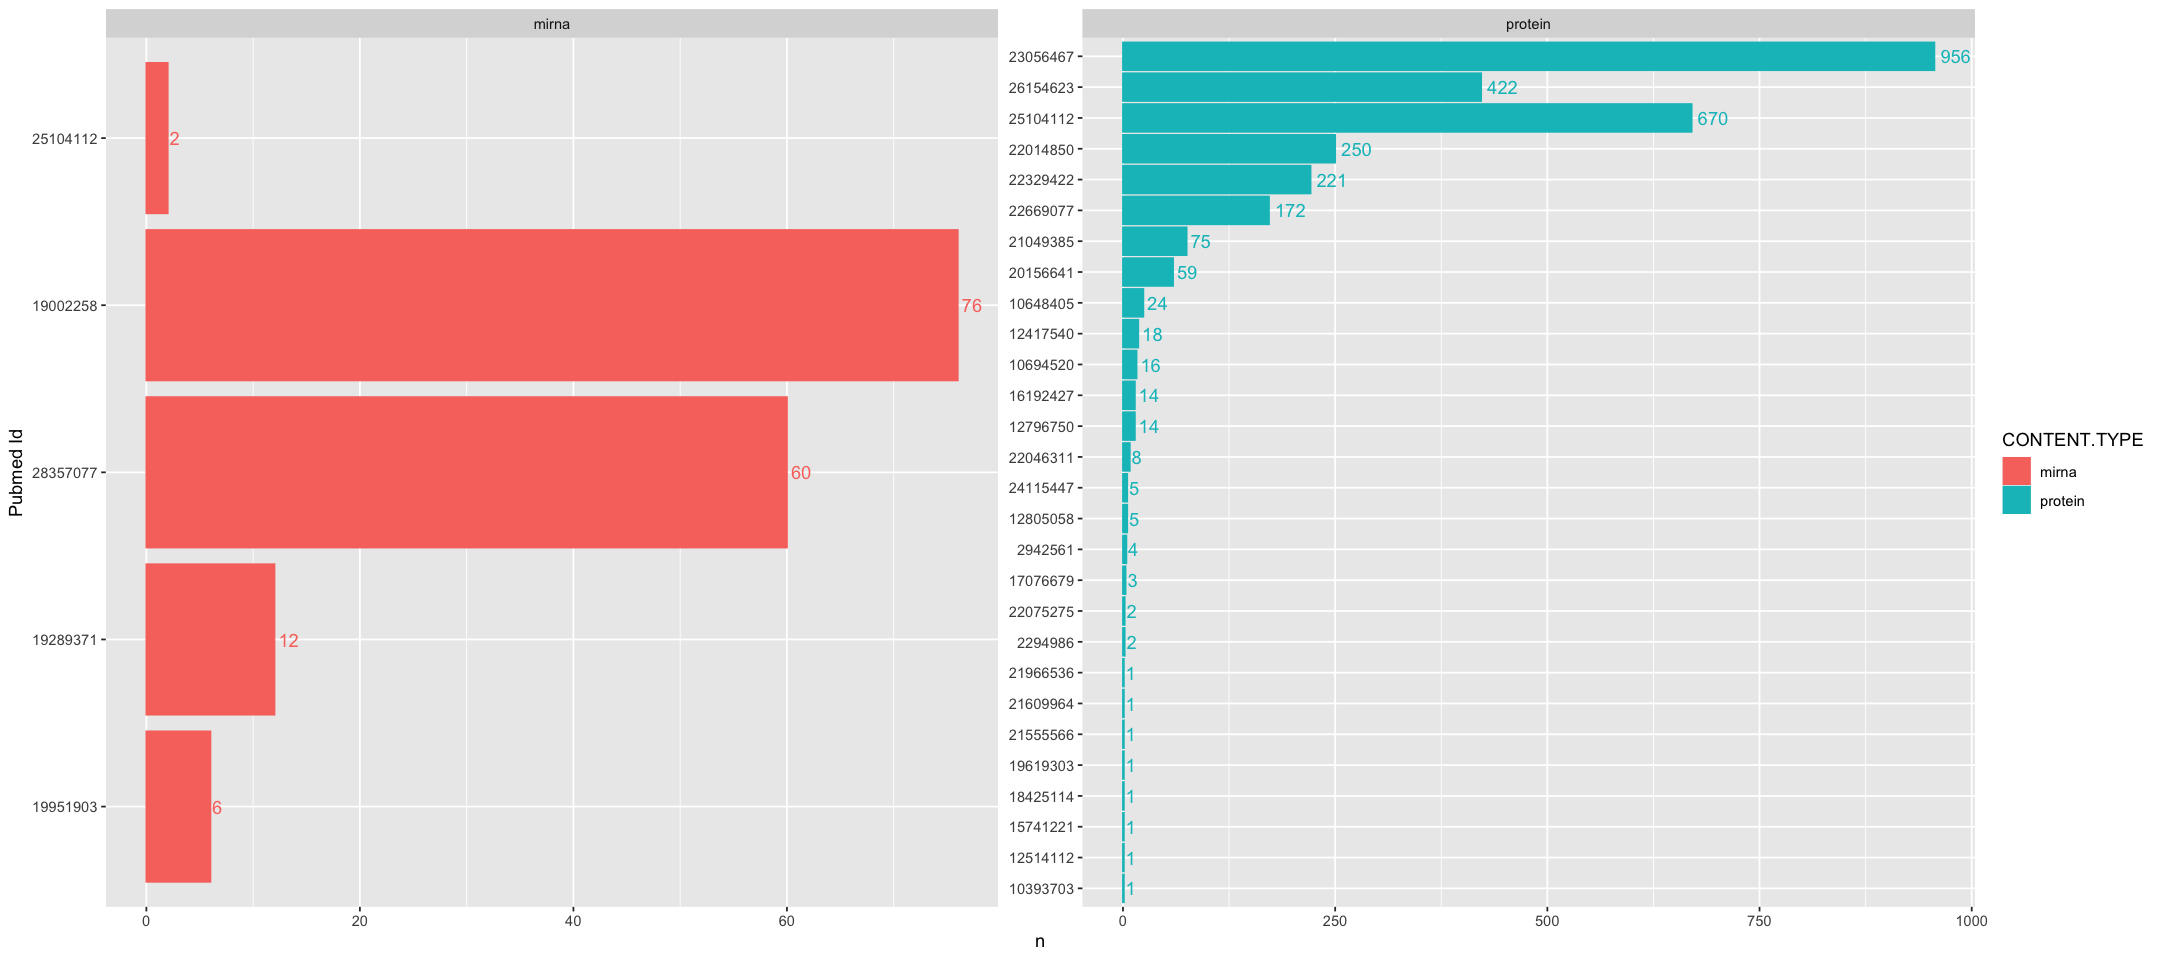

In [6]:
options(repr.plot.width=18, repr.plot.height=8) #changing size
ggplot(data = publication_count, aes(x = n, y = reorder(PUBMED.ID, n), fill = CONTENT.TYPE, color = CONTENT.TYPE)) + 
  geom_col() + 
  geom_text(aes(label = n, color = CONTENT.TYPE), position = position_dodge(width = 0.9), hjust = -0.2) +
  facet_wrap(~CONTENT.TYPE, scales = 'free') + 
  labs(y = 'Pubmed Id')

# How many proteins or miRNAs have been identified by species?

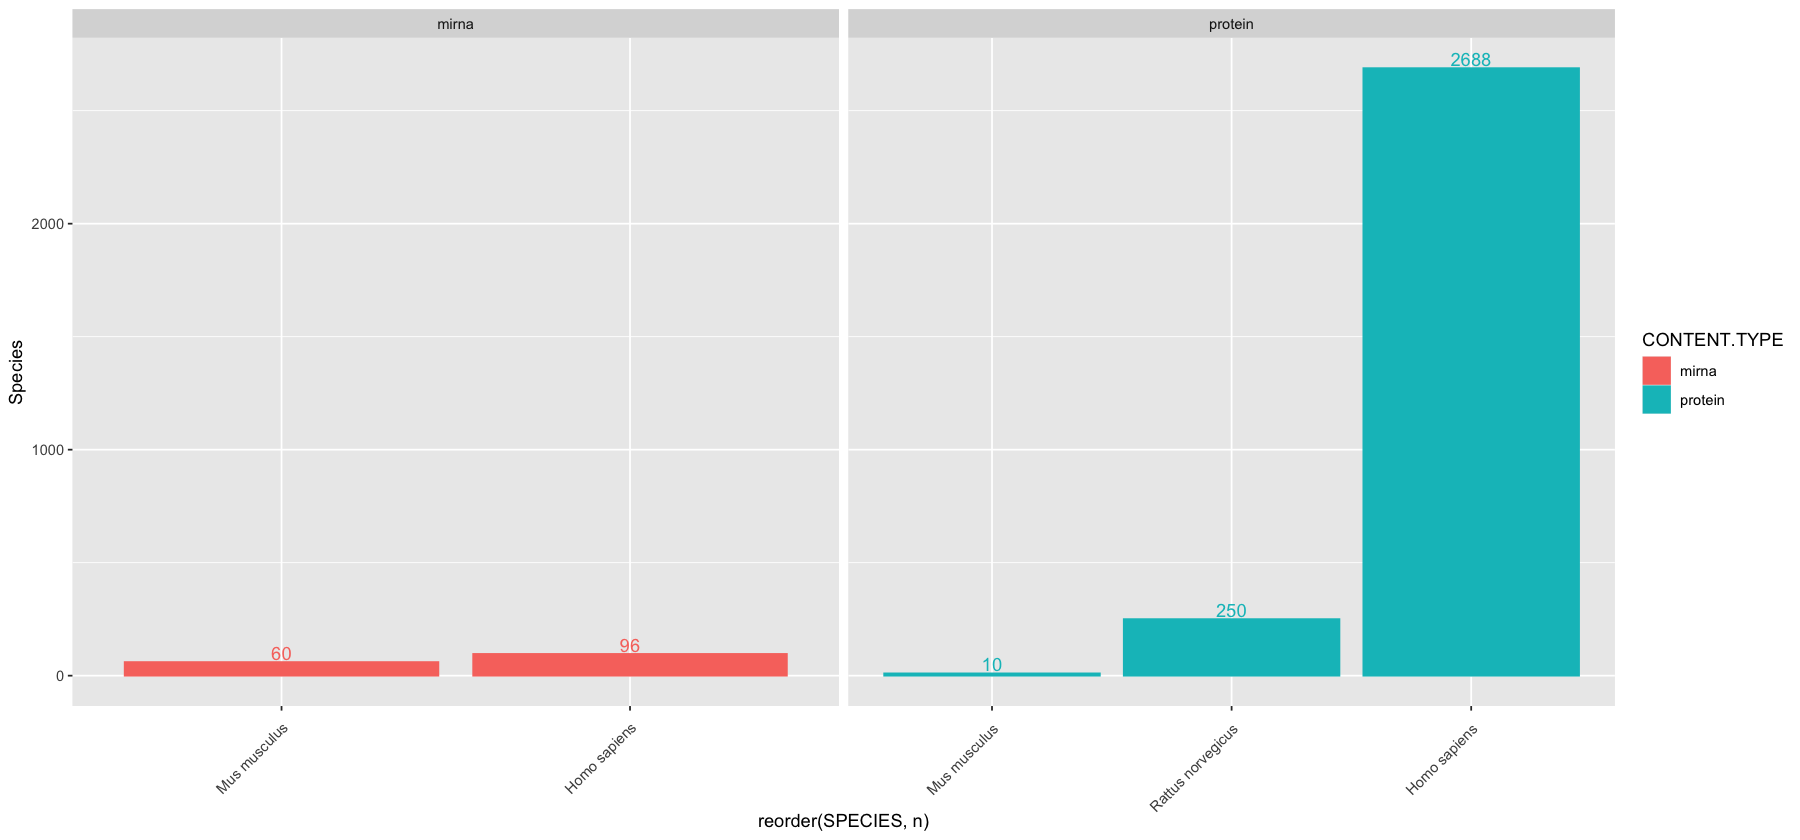

In [7]:
options(repr.plot.width=15, repr.plot.height=7) #changing size
species_count = all_data %>%
    group_by(CONTENT.TYPE, SPECIES) %>%
    count()

ggplot(data = species_count, aes(y = n, x = reorder(SPECIES, n), fill = CONTENT.TYPE, color = CONTENT.TYPE)) + 
  geom_col(position = 'dodge') + 
  geom_text(aes(label = n, color = CONTENT.TYPE), position = position_dodge(width = 0.9), vjust = -0.2) + 
  facet_wrap(~CONTENT.TYPE, scales = 'free_x') + 
  #rotating x labels/ moving x labels slightly to the left
  theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust = 0.99)) + 
  labs(y = 'Species')

# How many proteins or miRNAs have been identified by vesicle type?

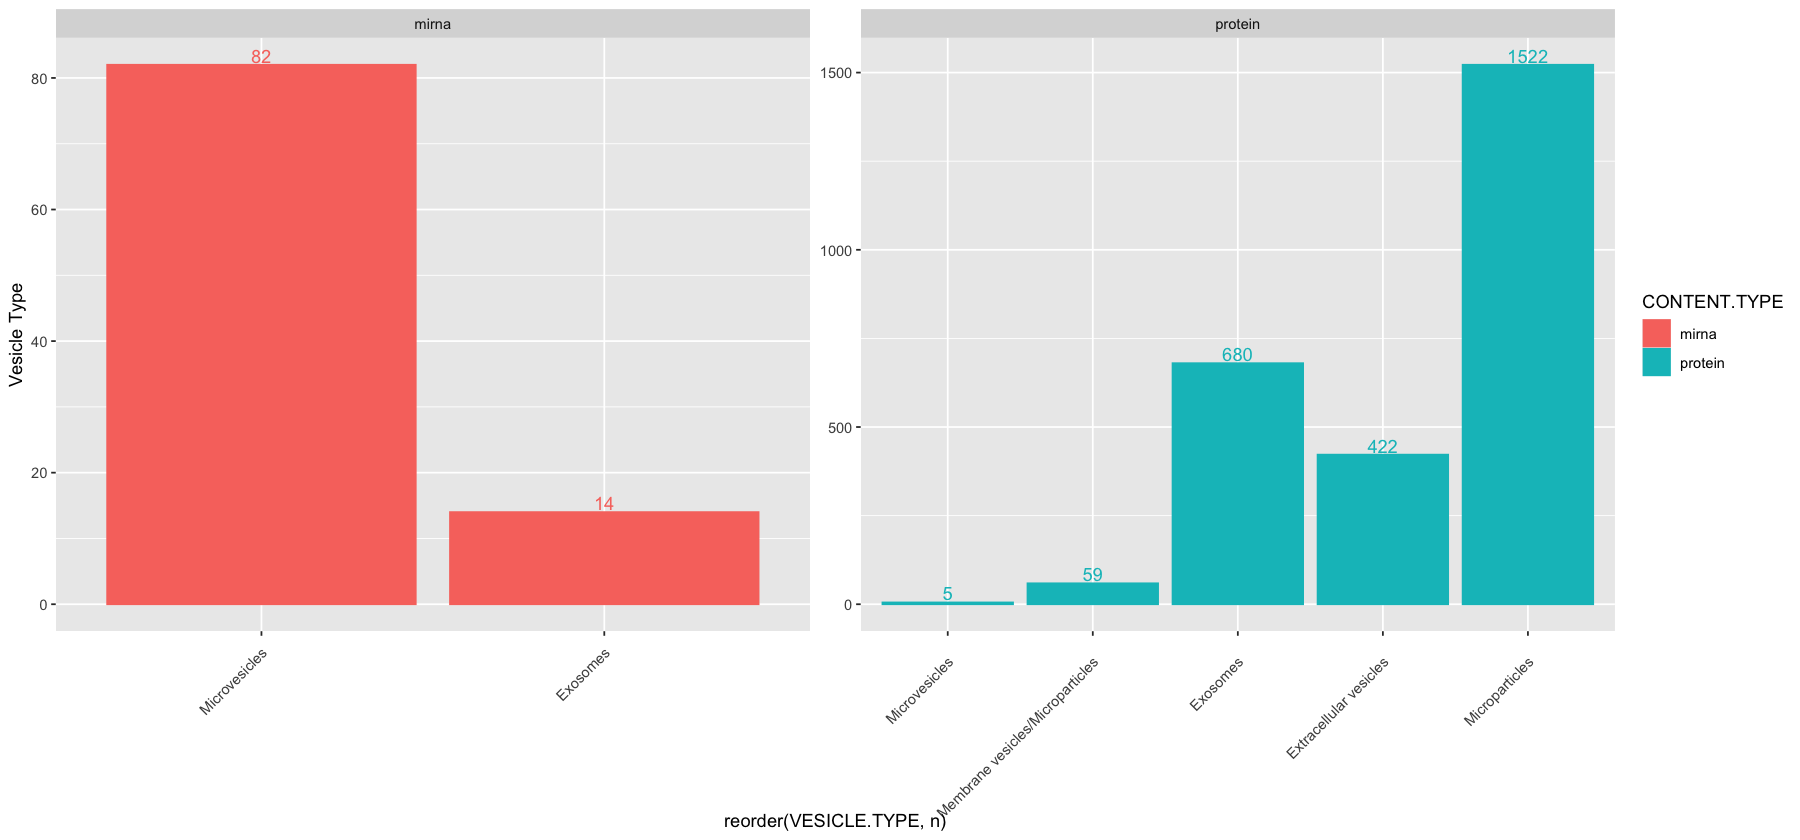

In [8]:
vesicle_type_count = all_data %>%
    group_by(CONTENT.TYPE, VESICLE.TYPE) %>%
    #just for humans
    filter(SPECIES == 'Homo sapiens') %>%
    count()

ggplot(data = vesicle_type_count, aes(y = n, x = reorder(VESICLE.TYPE, n), fill = CONTENT.TYPE, 
                                 color = CONTENT.TYPE)) + 
  geom_col(position = 'dodge') + 
  geom_text(aes(label = n, color = CONTENT.TYPE), position = position_dodge(width = 0.9), vjust = -0.2) + 
  facet_wrap(~CONTENT.TYPE, scales = 'free') + 
  #rotating x labels/ moving x labels slightly to the left
  theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust = 0.9999)) +
  labs(y = 'Vesicle Type')

# What proteins or miRNAs have been identified the most frequently?

In [9]:
mrna_count = mrna_data %>%
    #just for humans
    filter(SPECIES == 'Homo sapiens') %>%
    group_by(GENE.SYMBOL) %>%
    count() %>%
    arrange(-n) %>%
    filter(n >= 10) #just plotting the most frequent mrnas (>= 10)
mrna_count = full_join(mrna_count, protein_functions[,1:2], by = c("GENE.SYMBOL" = "Protein")) %>%
    arrange(Function,n)
head(mrna_count)

GENE.SYMBOL,n,Function
<chr>,<int>,<chr>
CD5L,10,apoptosis
ALB,12,apoptosis
A2M,10,blood coagulation
ANXA5,10,blood coagulation
GP1BA,10,blood coagulation
FN1,11,blood coagulation


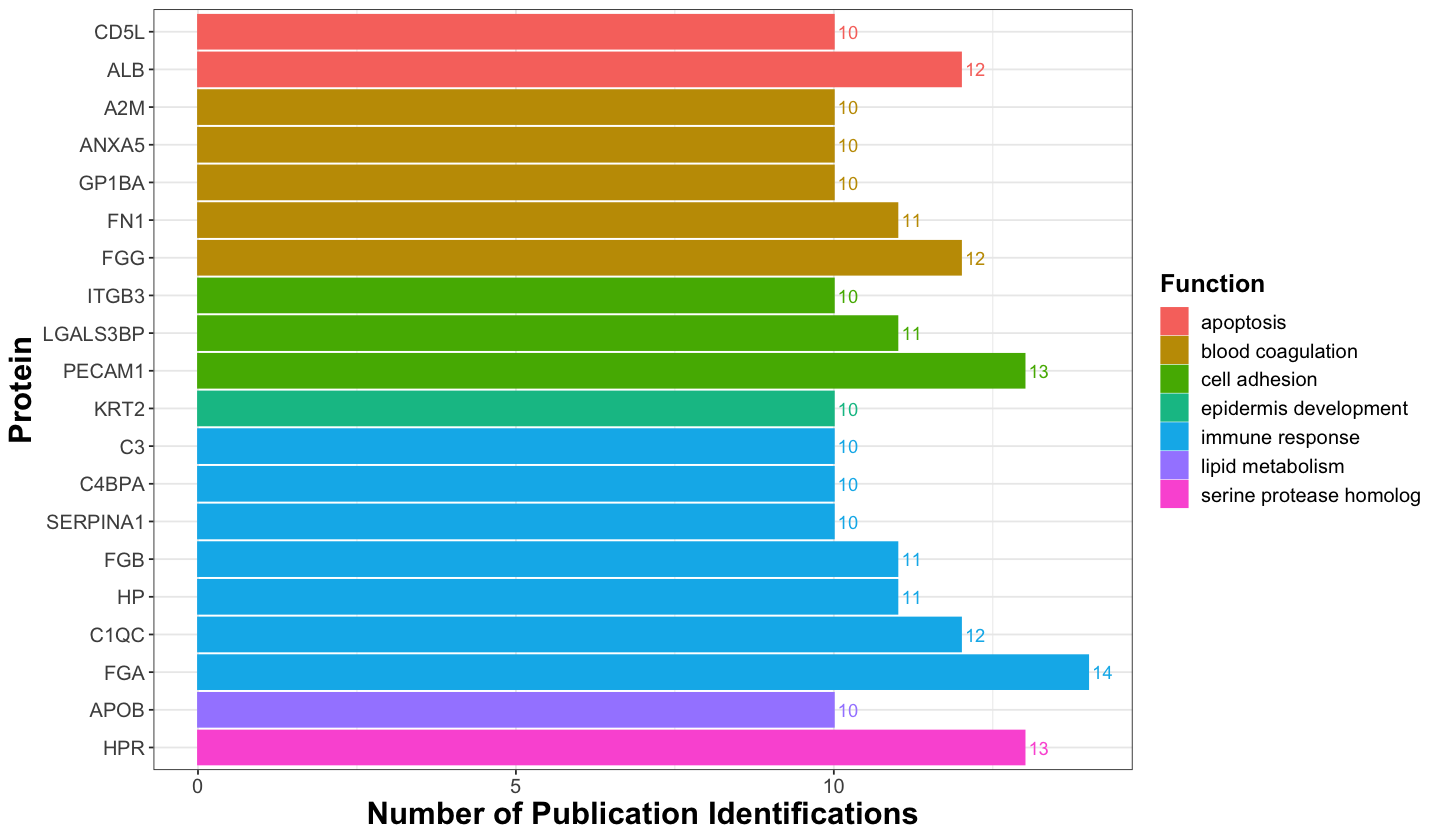

In [10]:
#grouped by function
options(repr.plot.width=12, repr.plot.height=7) #changing size
gene_levels = rev(mrna_count$GENE.SYMBOL) #had to reverse these levels to match the legend
ggplot(data = mrna_count, aes(x = n, y = factor(GENE.SYMBOL, levels = gene_levels), 
                              color = Function, fill = Function)) + 
  geom_col() + 
  geom_text(aes(label = n), position = position_dodge(width = 0.9), hjust = -0.2) + 

  theme_bw() + #changing theme
  theme(axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = "bold", size = 15),
        legend.text = element_text(size = 12)) + 
  labs(y = 'Protein', x = "Number of Publication Identifications")

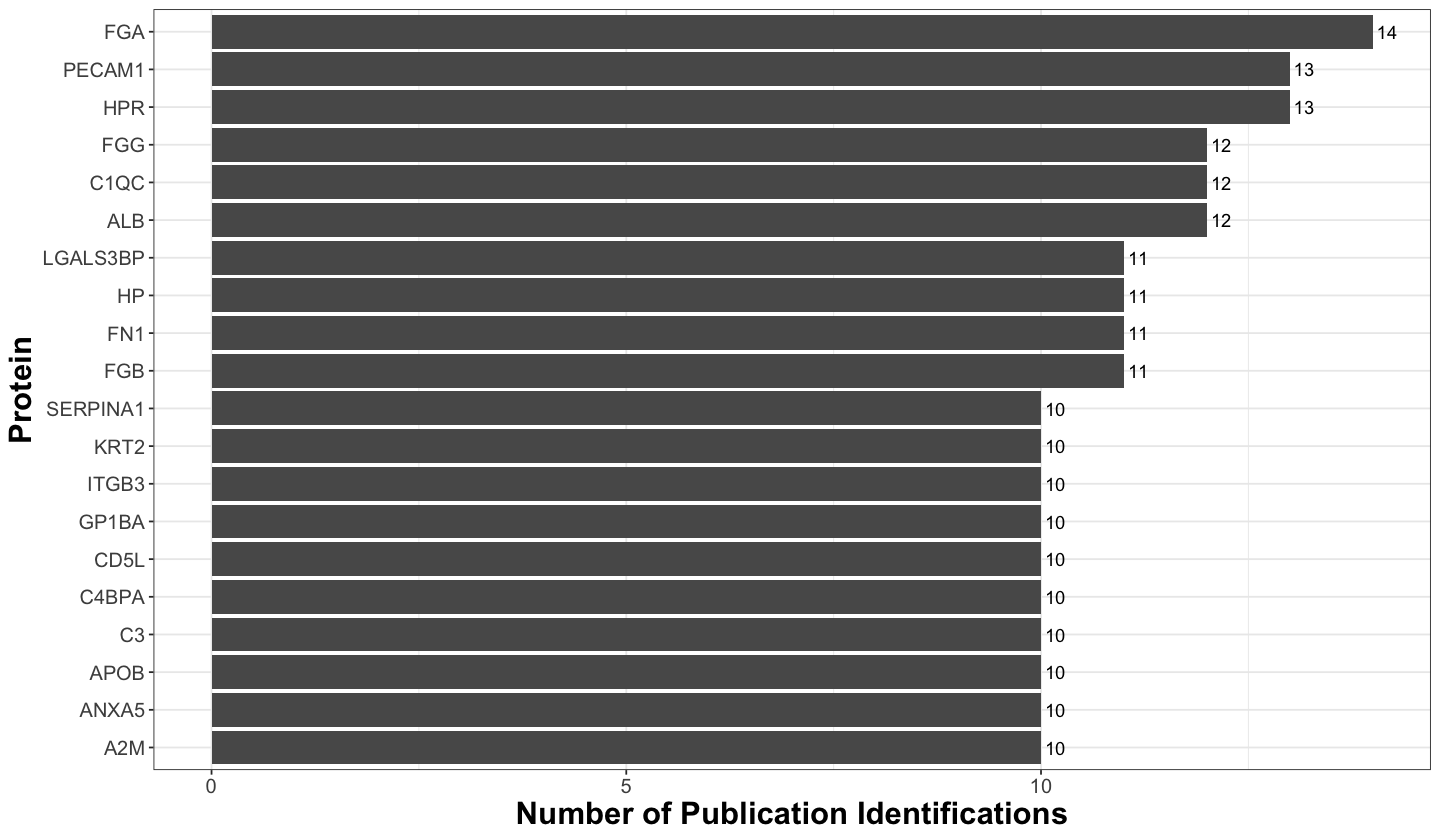

In [11]:
#now just creating the same bar chart above w/o the functions
options(repr.plot.width=12, repr.plot.height=7) #changing size
ggplot(data = mrna_count, aes(x = n, y = reorder(GENE.SYMBOL, n))) + 
  geom_col() + 
  geom_text(aes(label = n), position = position_dodge(width = 0.9), hjust = -0.2) + 

  theme_bw() + #changing theme
  theme(axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = "bold", size = 15),
        legend.text = element_text(size = 12)) + 
  labs(y = 'Protein', x = "Number of Publication Identifications")

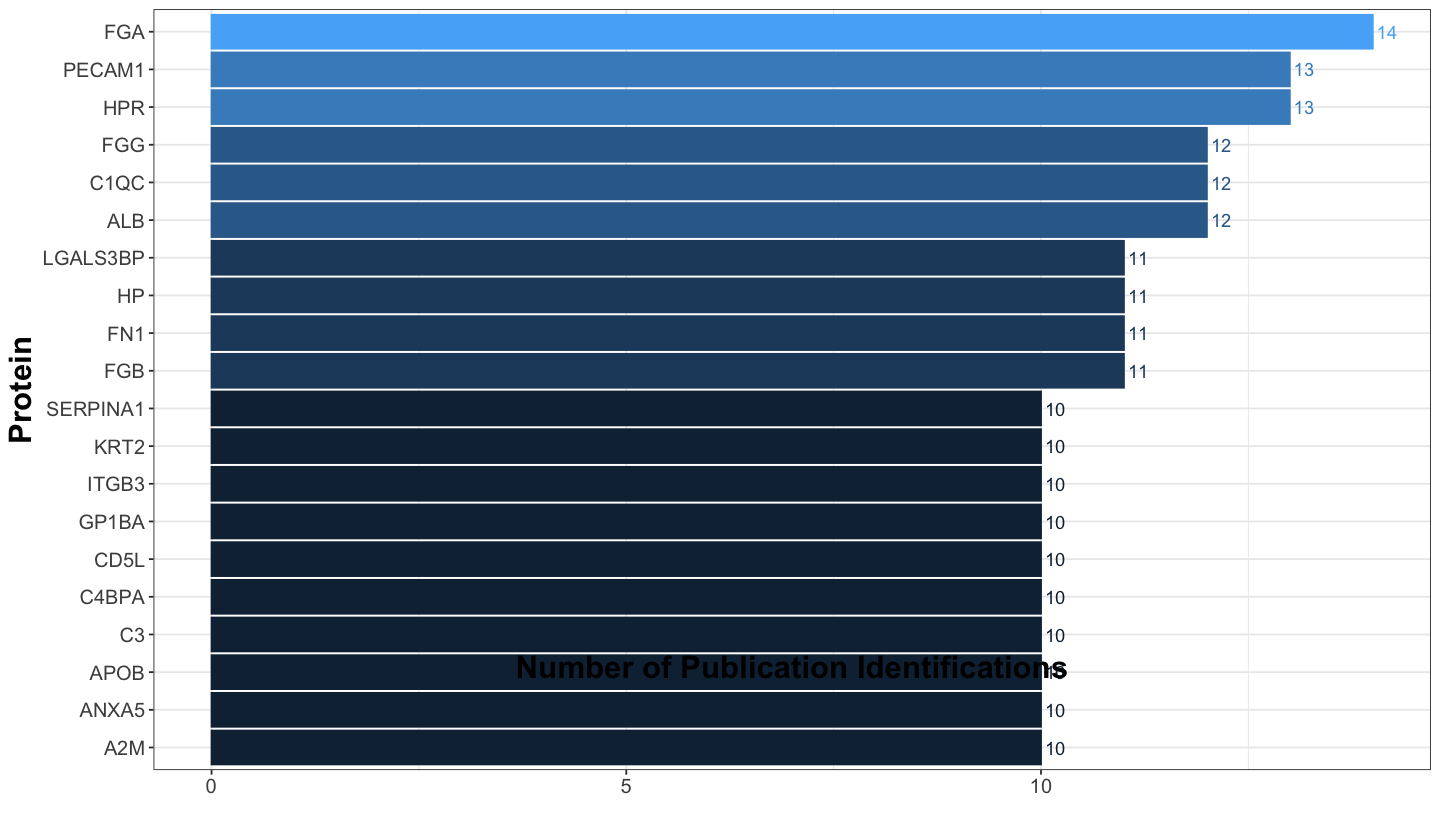

In [12]:
#grouped by number of identifications
options(repr.plot.width=12, repr.plot.height=7) #changing size
protein_publications_graph = ggplot(data = mrna_count, aes(x = n, y = reorder(GENE.SYMBOL, n), 
                              color = n, fill = n)) + 
  geom_col() + 
  geom_text(aes(label = n), position = position_dodge(width = 0.9), hjust = -0.2) + 

  theme_bw() + #changing theme
  theme(axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        axis.title.x = element_text(vjust = 22), #need this in order to not have space in patchwork
        legend.position = "none") + #remvoing legend
  labs(y = 'Protein', x = "Number of Publication Identifications")

protein_publications_graph

In [13]:
#adding functions to mirna count df
mirna_count = mirna_data %>%
    #just for humans
    filter(SPECIES == 'Homo sapiens') %>%
    group_by(MIRNA.ID) %>%
    count() %>%
    arrange(-n) %>%
    filter(n >= 2) #just plotting the most frequent mirnas (>= 2)
mirna_count = full_join(mirna_count, mirna_functions[,1:2], by = c("MIRNA.ID" = "miRNA")) %>%
    arrange(Function,n)
head(mirna_count)

MIRNA.ID,n,Function
<chr>,<int>,<chr>
miR-106a,2,mRNA 3'-UTR binding
miR-29a,2,mRNA 3'-UTR binding
miR-142-3p,3,mRNA 3'-UTR binding
miR-103,4,mRNA 3'-UTR binding
RNU6B,2,posttranscriptional gene silencing
miR-148b,2,posttranscriptional gene silencing


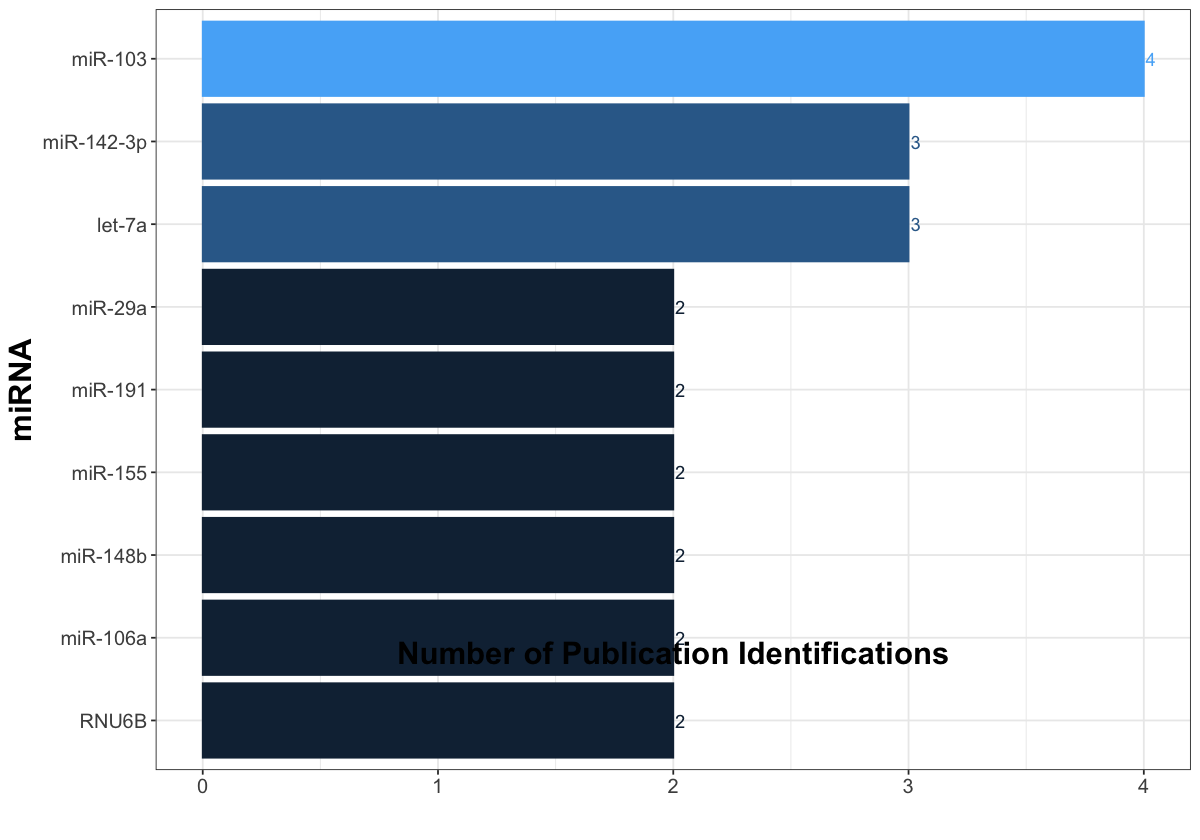

In [14]:
#plotting by number of identifications
options(repr.plot.width=10, repr.plot.height=7) #changing size
mirna_publications_graph = ggplot(data = mirna_count, aes(x = n, y = reorder(MIRNA.ID, n), color = n, fill = n)) + 
  geom_col() + 
  geom_text(aes(label = n), position = position_dodge(width = 0.9), hjust = -0.2) + 
  theme_bw() + #changing theme
  theme(axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        axis.title.x = element_text(vjust = 24), #need this in order to not have space in patchwork
        legend.position = "none") + #remvoing legend
  labs(y = 'miRNA', x = "Number of Publication Identifications")

mirna_publications_graph

# What functions are associated with each protein or mirna?

In [15]:
#now making heat map of protein functions
melted_protein_functions = data.frame(read_excel("Protein Functions.xlsx", sheet = 2)) %>%
    reshape2::melt(id = "Protein", variable = "Function", value.name = "Value")
head(melted_protein_functions)


ordered_protein_functions_df = melted_protein_functions %>%
    group_by(Function) %>%
    summarize(Avg_Value = mean(Value)) %>%
    #highest to lowest avg function value
    arrange(desc(Avg_Value))
ordered_protein_functions = ordered_protein_functions_df$Function

,Protein,Function,Value
,<chr>,<fct>,<dbl>
1,FGA,immune_response,1
2,PECAM1,immune_response,0
3,HPR,immune_response,0
4,FGG,immune_response,0
5,C1QC,immune_response,1
6,ALB,immune_response,0


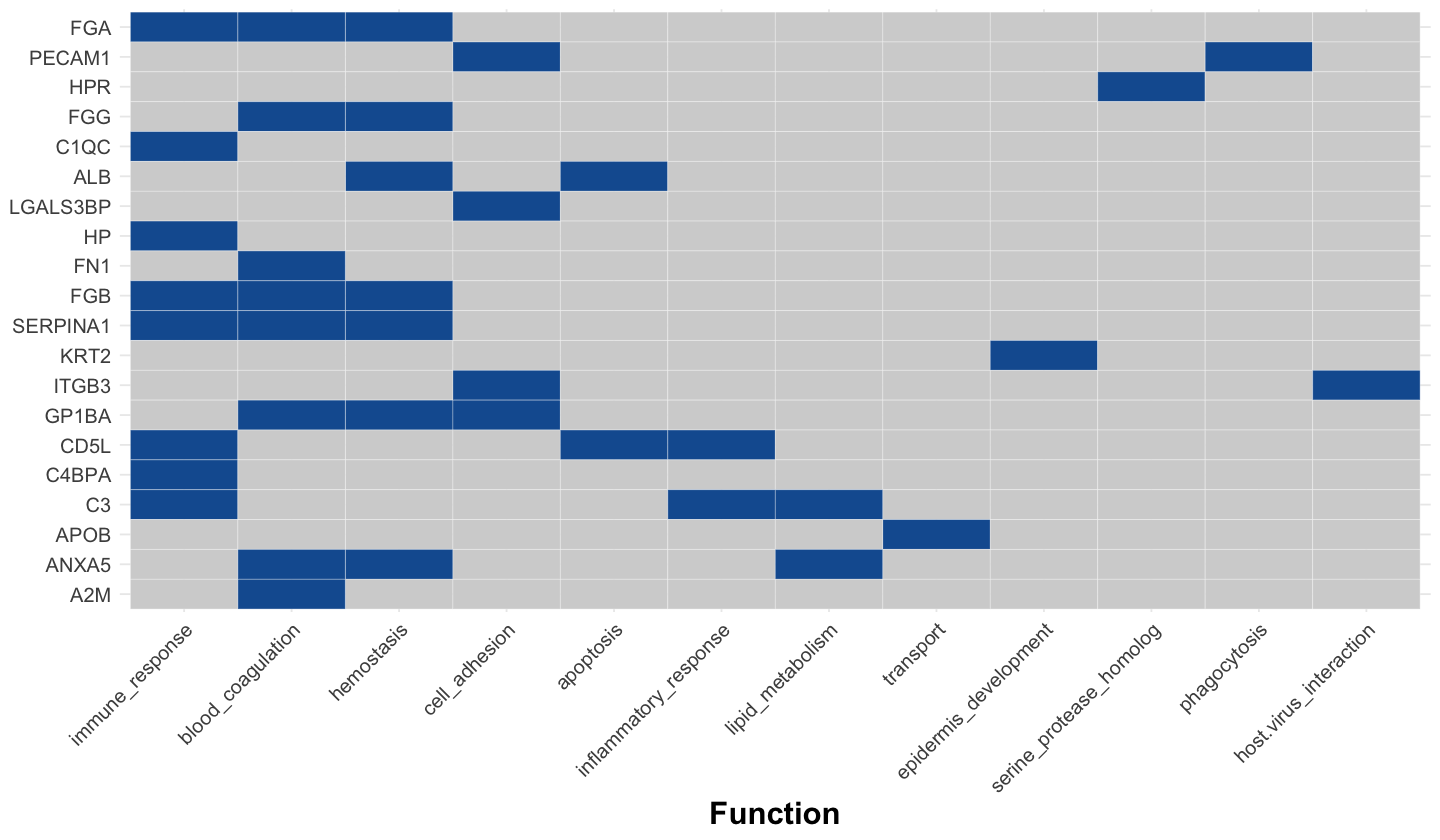

In [16]:
options(repr.plot.width=12, repr.plot.height=7) #changing size
protein_publication_levels = levels(reorder(mrna_count$GENE.SYMBOL, mrna_count$n))
protein_heat_map = ggplot(data = melted_protein_functions, aes(x = factor(Function, levels = ordered_protein_functions), 
                                            y = factor(Protein, levels = protein_publication_levels), 
                                            #need to figure out how to make this binary 
                                            fill = Value)) + 
  geom_tile(color = 'white') + 
  scale_fill_gradient(low = "light gray", high = "#145DA0") +
  
  theme_minimal() + #changing theme
  theme(axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.position = "none", #removing legend 
        legend.text = element_text(size = 12),
        #rotating x labels/ moving x labels slightly to the left
        axis.text.x = element_text(angle = 45, hjust = 0.9999),
        axis.title.y = element_blank()) + #removes y axis title

  labs(x = "Function", fill = "Function")

protein_heat_map

In [17]:
#now making heat map of mirna functions
melted_mirna_functions = data.frame(read_excel("miRNA Functions.xlsx", sheet = 2)) %>%
    reshape2::melt(id = "miRNA", variable = "Function", value.name = "Value")
head(melted_mirna_functions)


ordered_mirna_functions_df = melted_mirna_functions %>%
    group_by(Function) %>%
    summarize(Avg_Value = mean(Value)) %>%
    #highest to lowest avg function value
    arrange(desc(Avg_Value))
ordered_mirna_functions = ordered_mirna_functions_df$Function

,miRNA,Function,Value
,<chr>,<fct>,<dbl>
1,miR-103,mRNA_3_prime.UTR_binding,1
2,miR-142-3p,mRNA_3_prime.UTR_binding,1
3,let-7a,mRNA_3_prime.UTR_binding,0
4,miR-29a,mRNA_3_prime.UTR_binding,1
5,miR-191,mRNA_3_prime.UTR_binding,0
6,miR-155,mRNA_3_prime.UTR_binding,0


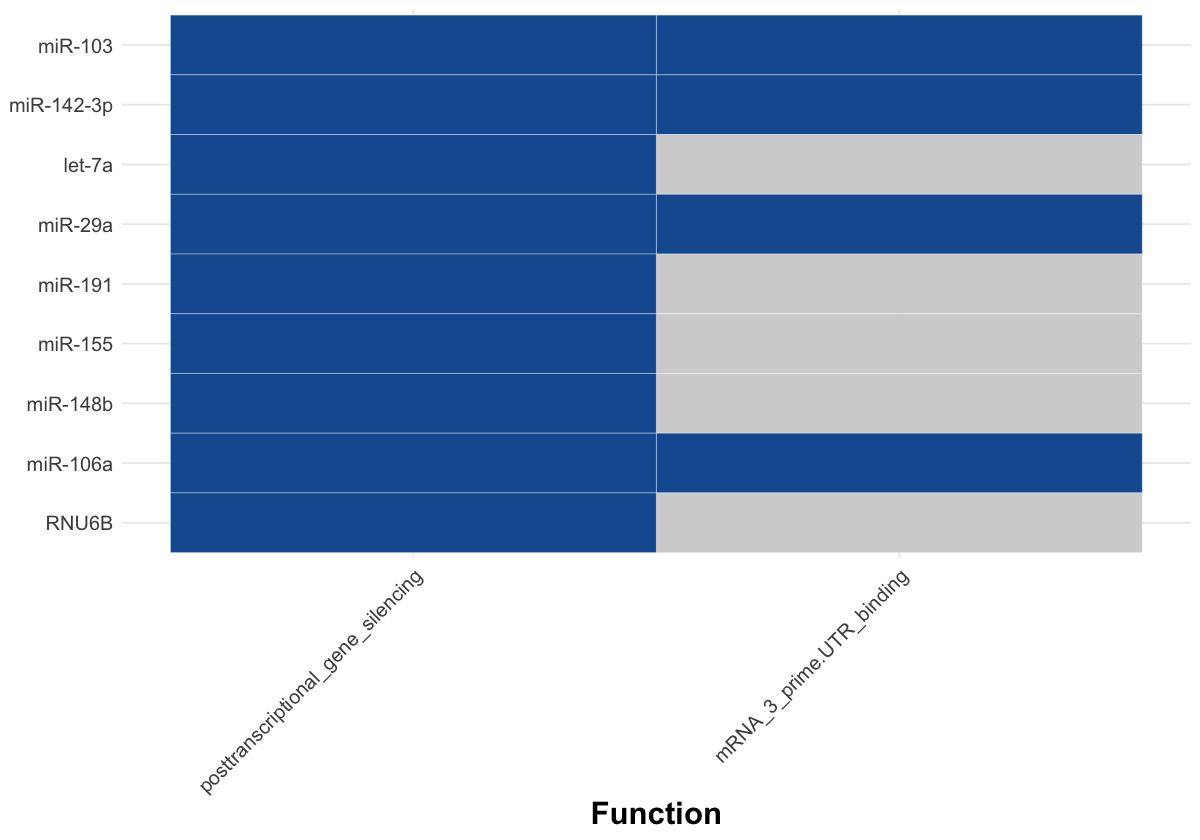

In [18]:
options(repr.plot.width=10, repr.plot.height=7) #changing size
mirna_publication_levels = levels(reorder(mirna_count$MIRNA.ID, mirna_count$n))
mirna_heat_map = ggplot(data = melted_mirna_functions, aes(x = factor(Function, levels = ordered_mirna_functions), 
                                            y = factor(miRNA, levels = mirna_publication_levels), 
                                            #need to figure out how to make this binary 
                                            fill = Value)) + 
  geom_tile(color = 'white') + 
  scale_fill_gradient(low = "light gray", high = "#145DA0") +
  
  theme_minimal() + #changing theme
  theme(axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.position = "none", #removing legend 
        legend.text = element_text(size = 12),
        #rotating x labels/ moving x labels slightly to the left
        axis.text.x = element_text(angle = 45, hjust = 0.9999),
        axis.title.y = element_blank()) + #removes y axis title

  labs(x = "Function", fill = "Function")

mirna_heat_map

# Protein/miRNA Function and Publication Identifications

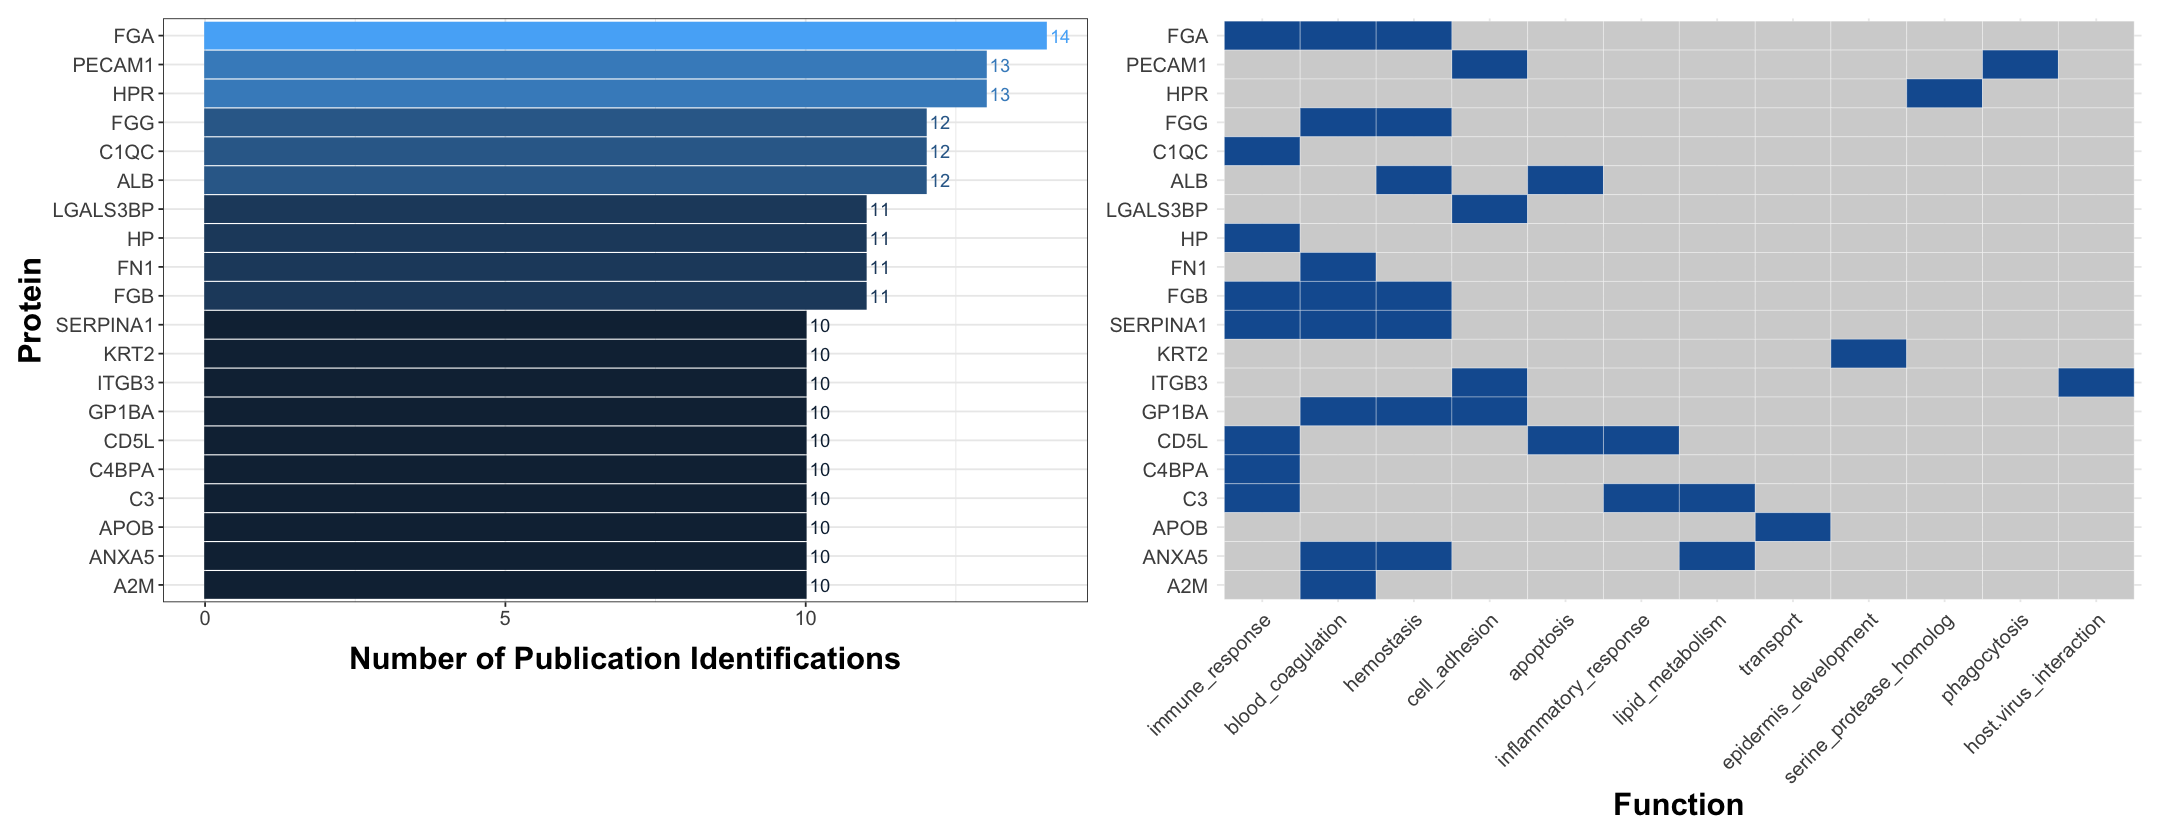

In [19]:
#protein heat map and identifications
options(repr.plot.width=18, repr.plot.height=7) #changing size

Figure3 = protein_publications_graph + protein_heat_map 
Figure3

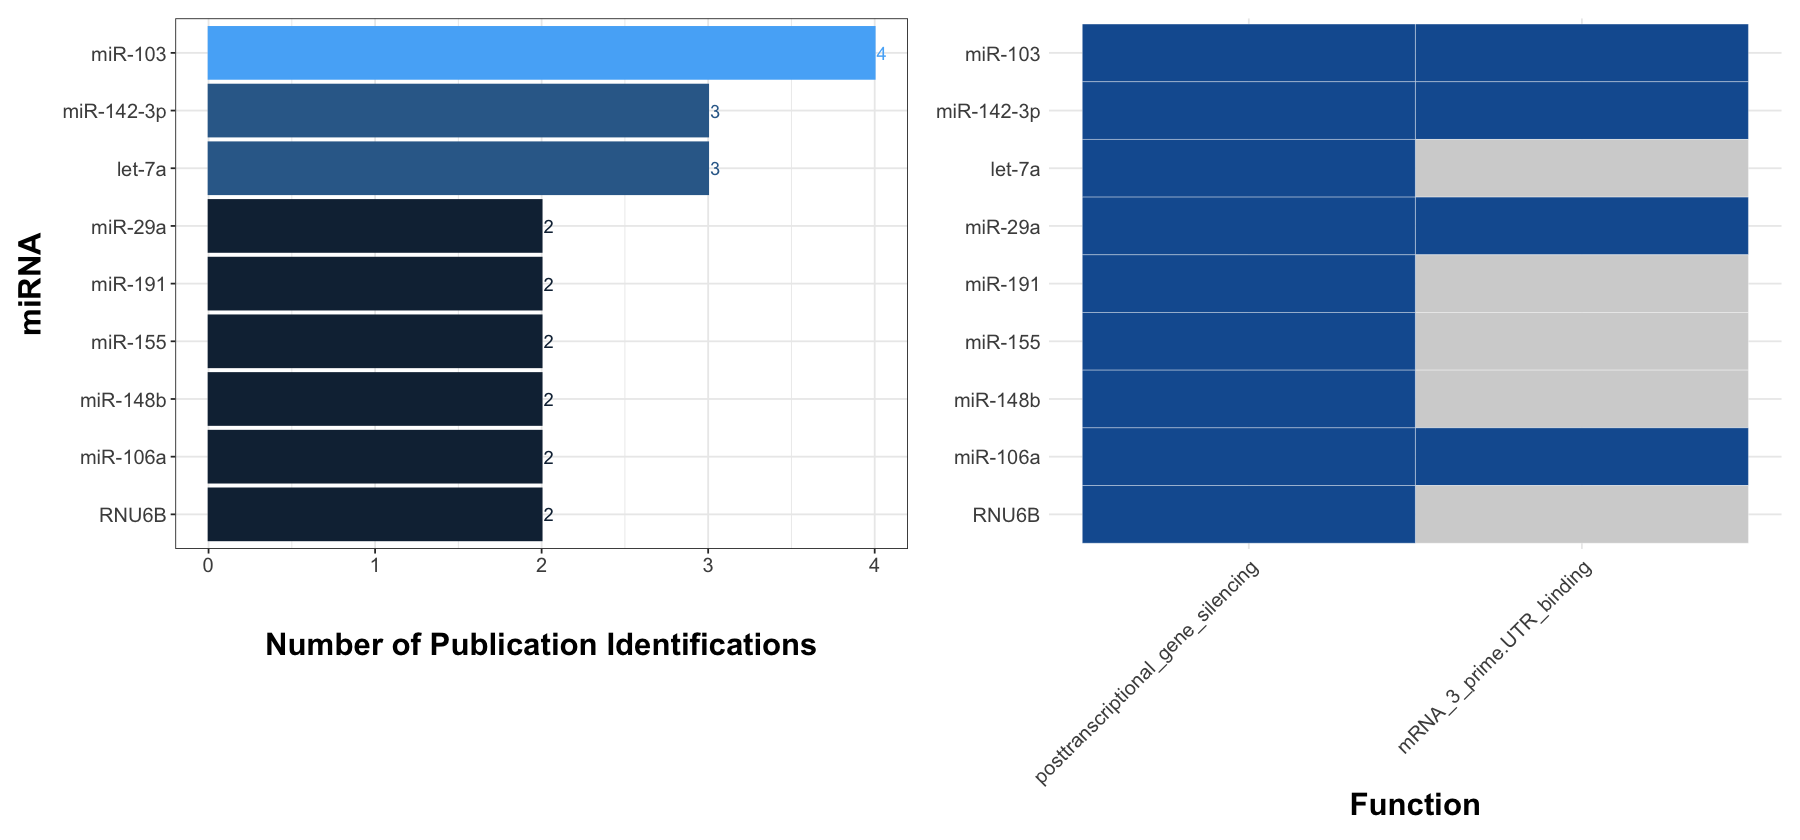

In [20]:
#mirna heat map and identifications
options(repr.plot.width=15, repr.plot.height=7) #changing size

mirna_publications_graph + mirna_heat_map

In [21]:
#exporting figure
ggsave(Figure3, 
       filename = 'Figure3.pdf',
       path = Output,
       width = 18, height = 7)